In [271]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [272]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- customerID : L'identifiant unique du client dans la base de données. Cela permet de distinguer chaque client dans le dataset.

- gender : Le genre du client (par exemple, "Male" ou "Female").

- SeniorCitizen : Indique si le client est un senior (généralement, 1 pour senior et 0 pour non senior).

- Partner : Indique si le client a un partenaire (par exemple, "Yes" ou "No").

- Dependents : Indique si le client a des personnes à charge (enfants ou autres personnes dépendantes, par exemple, "Yes" ou "No").

- tenure : Le nombre de mois pendant lesquels le client est resté avec l'entreprise. Cela représente la durée de la relation avec l'entreprise.

- PhoneService : Indique si le client a un service téléphonique avec l'entreprise ("Yes" ou "No").

- MultipleLines : Indique si le client a plusieurs lignes téléphoniques ("Yes", "No", ou "No phone service").

- InternetService : Le type de service Internet que le client utilise, par exemple, "DSL", "Fiber optic", ou "No".

- OnlineSecurity : Indique si le client a souscrit un service de sécurité en ligne ("Yes" ou "No").

- OnlineBackup : Indique si le client a souscrit un service de sauvegarde en ligne ("Yes" ou "No").

- DeviceProtection : Indique si le client a souscrit un service de protection de ses appareils ("Yes" ou "No").

- TechSupport : Indique si le client a accès à un service de support technique ("Yes" ou "No").

- StreamingTV : Indique si le client a accès au service de streaming de télévision ("Yes" ou "No").

- StreamingMovies : Indique si le client a accès au service de streaming de films ("Yes" ou "No").

- Contract : Le type de contrat que le client a avec l'entreprise. Par exemple, "Month-to-month", "One year", ou "Two year".

- PaperlessBilling : Indique si le client utilise la facturation électronique (sans papier) ("Yes" ou "No").

- PaymentMethod : La méthode de paiement choisie par le client. Cela pourrait être "Electronic check", "Mailed check", "Bank transfer", ou "Credit card".

- MonthlyCharges : Le montant que le client paie chaque mois pour les services fournis.

- TotalCharges : Le montant total payé par le client au fil du temps, en fonction de la durée de son abonnement et des frais mensuels.

- Churn : La variable cible, indiquant si le client a quitté l'entreprise ou non (churn). Cela pourrait être "Yes" (le client a quitté) ou "No" (le client est toujours avec l'entreprise).

In [273]:
data.shape

(7043, 21)

In [274]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [276]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [277]:

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [278]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [279]:
data.drop(columns=['customerID'], inplace=True)


In [280]:
num_var = data.select_dtypes(['float','int'])
cat_var = data.select_dtypes('object')


In [281]:
cat_var

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


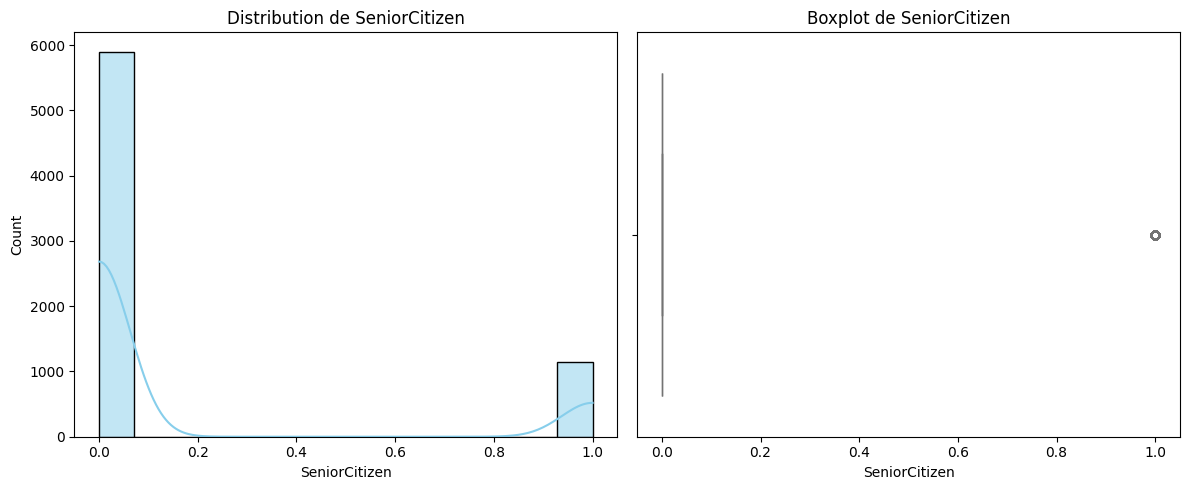

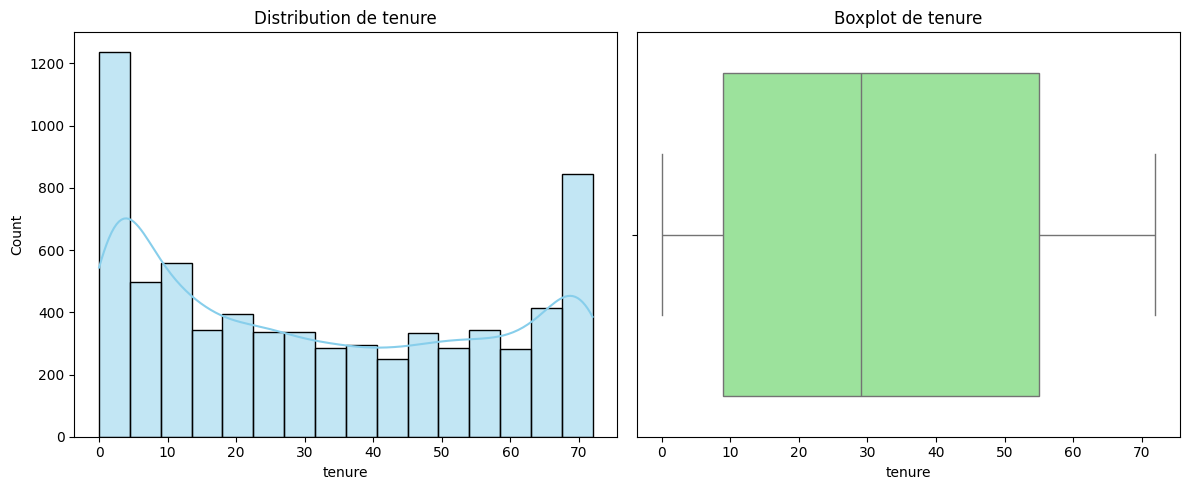

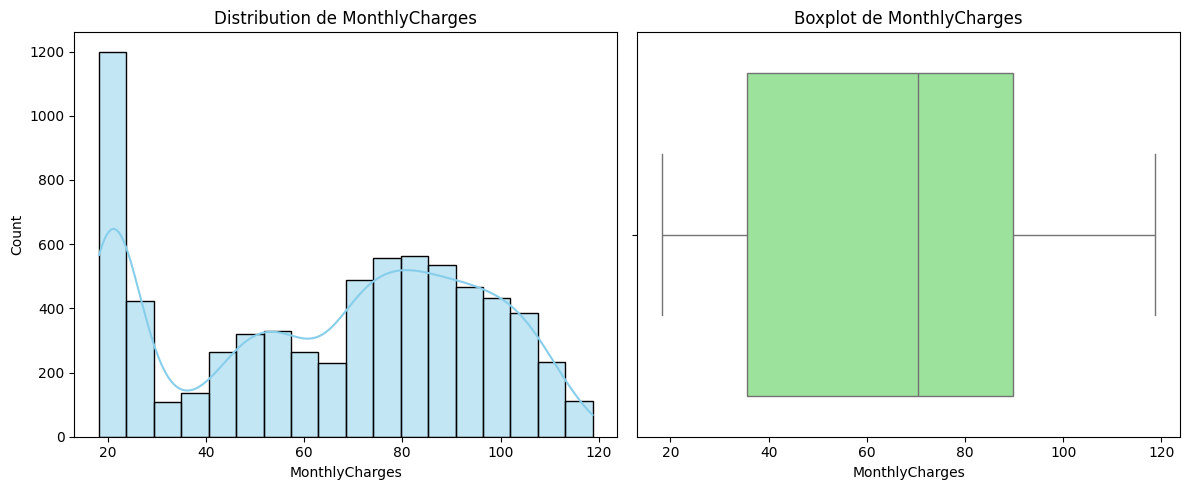

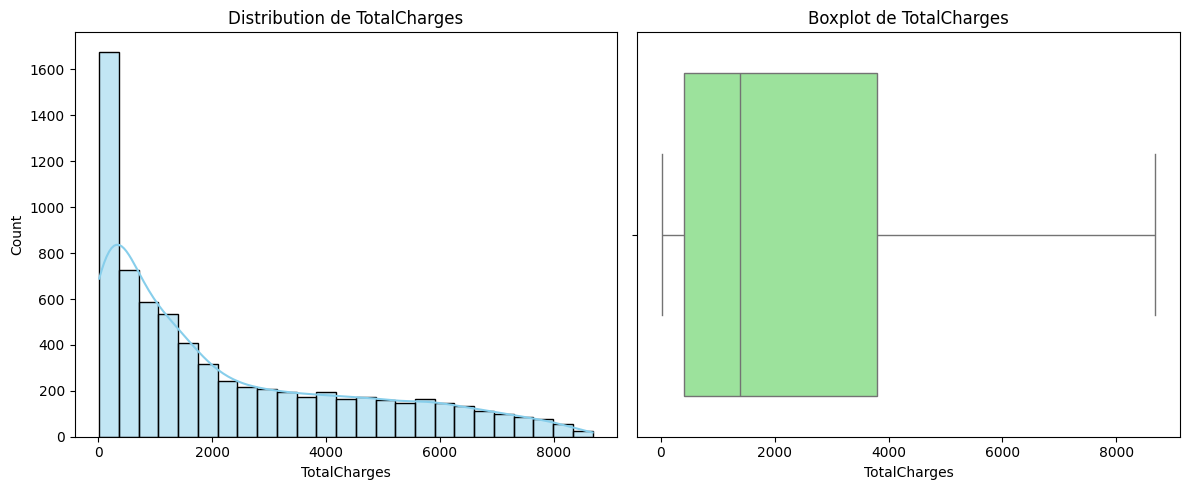

In [282]:
for var in num_var:
    plt.figure(figsize=(12,5))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.title(f'Distribution de {var}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()

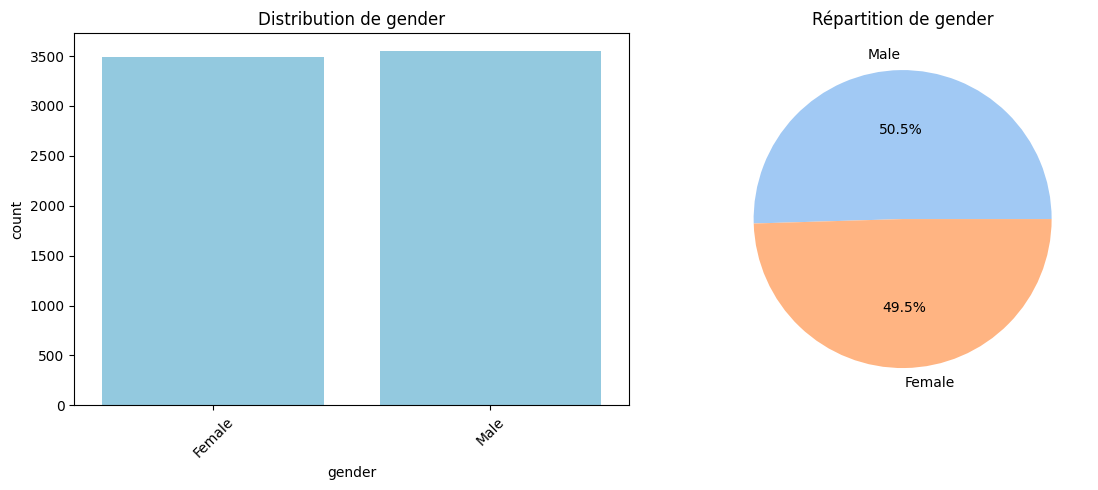

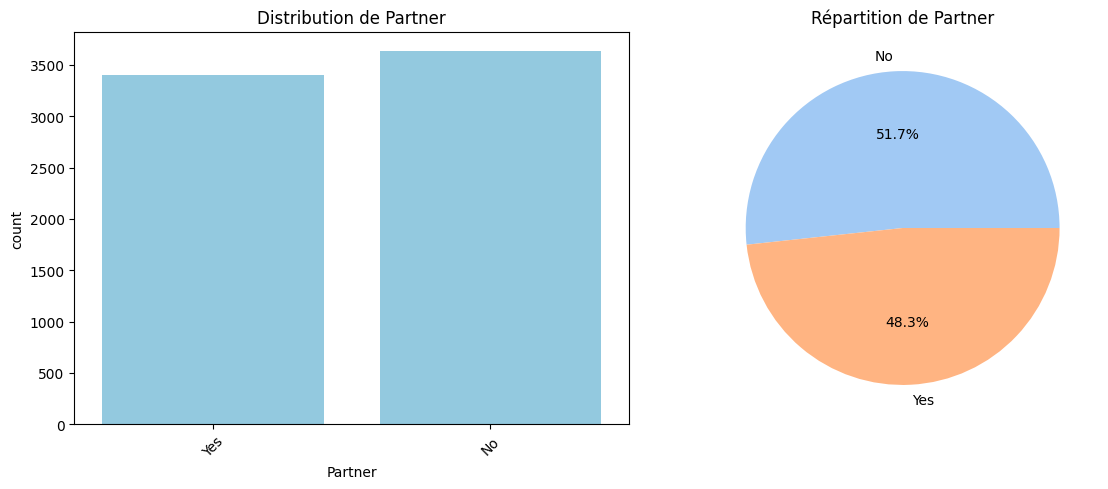

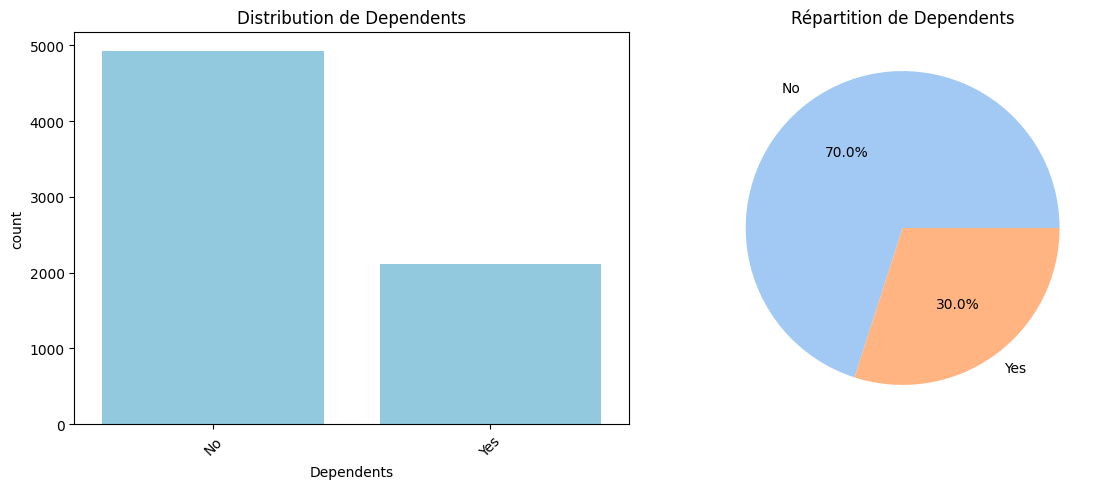

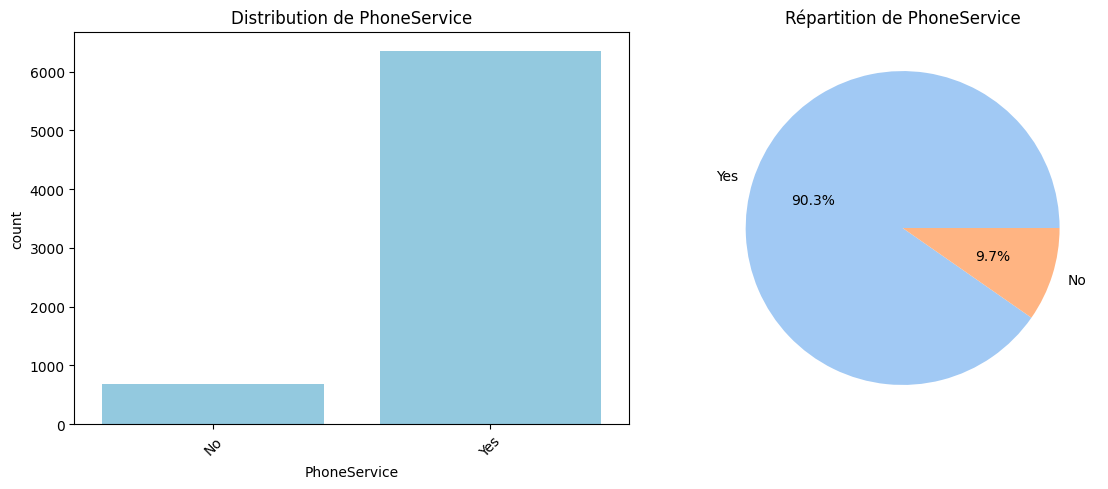

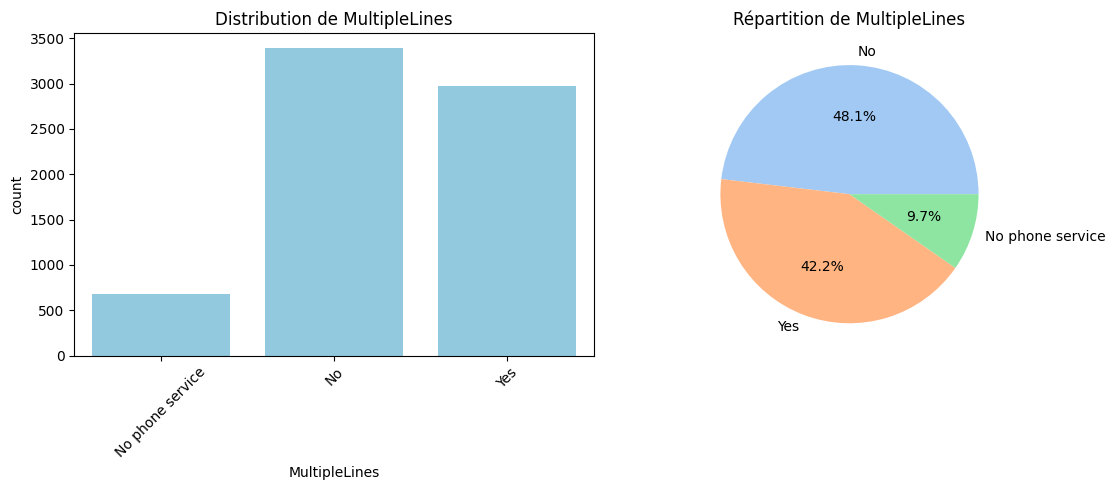

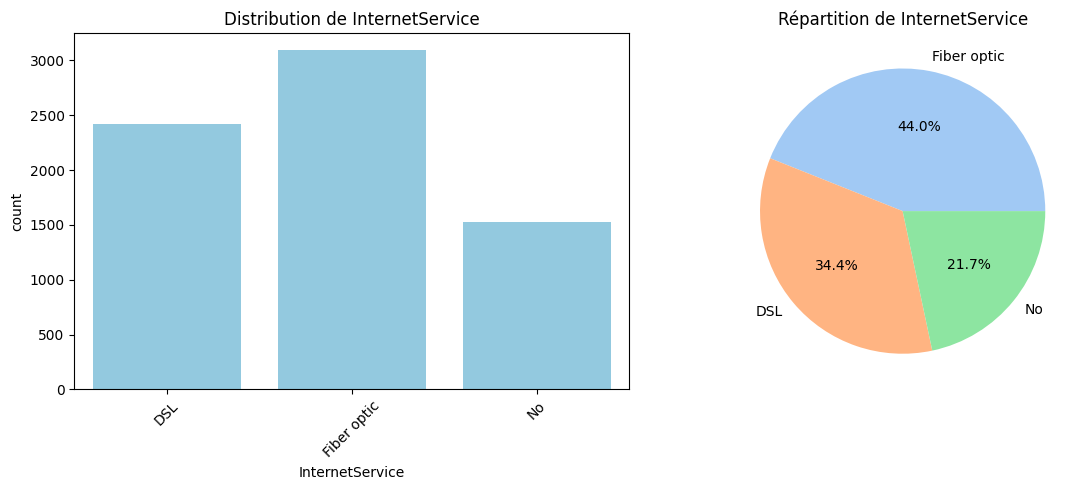

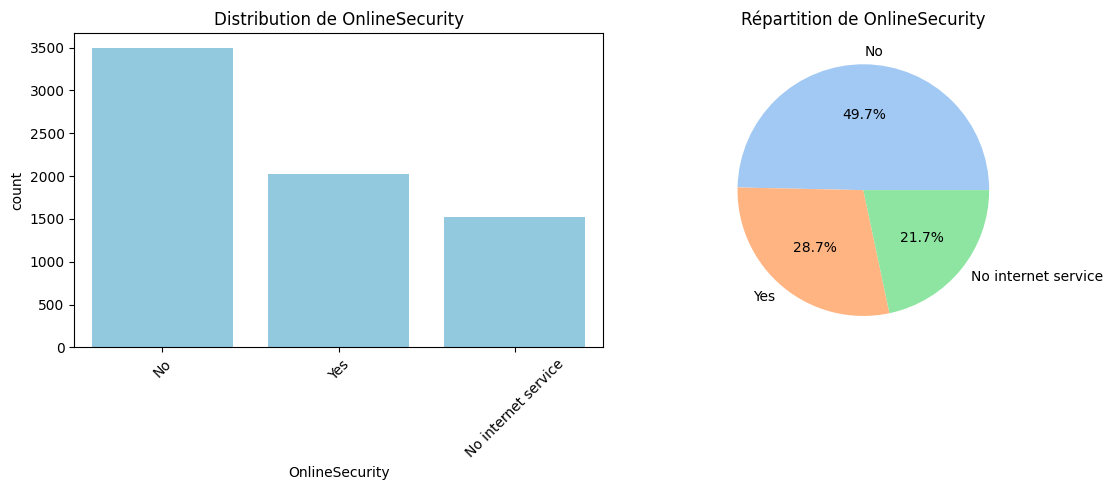

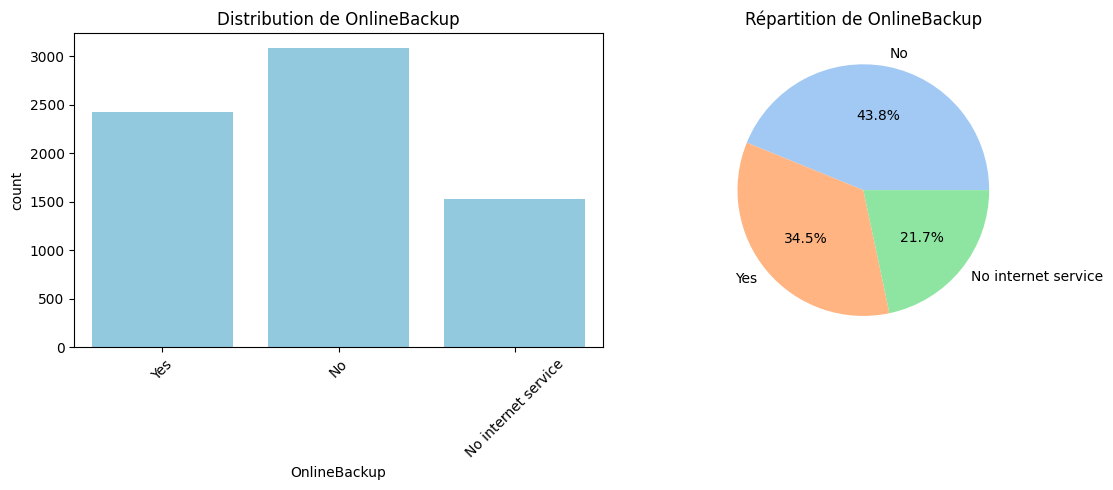

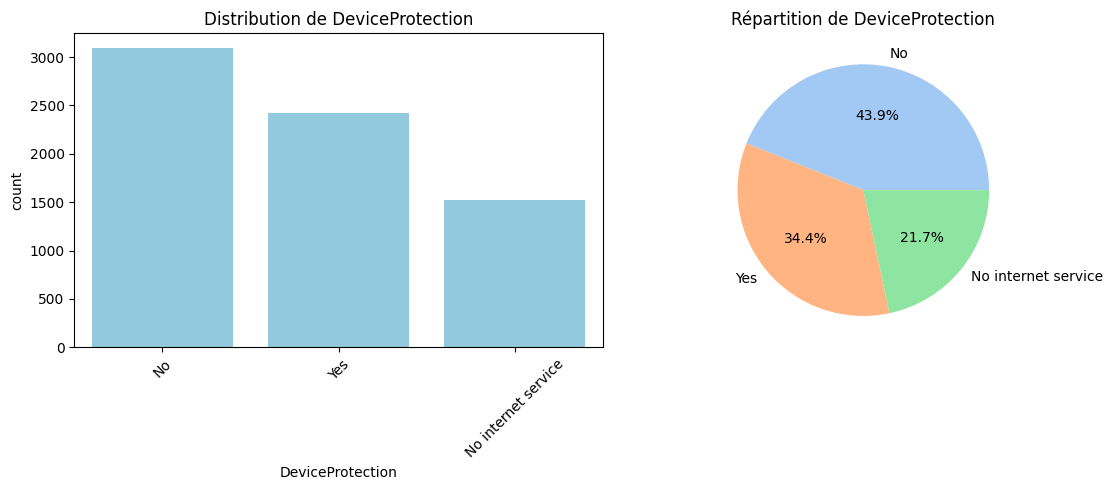

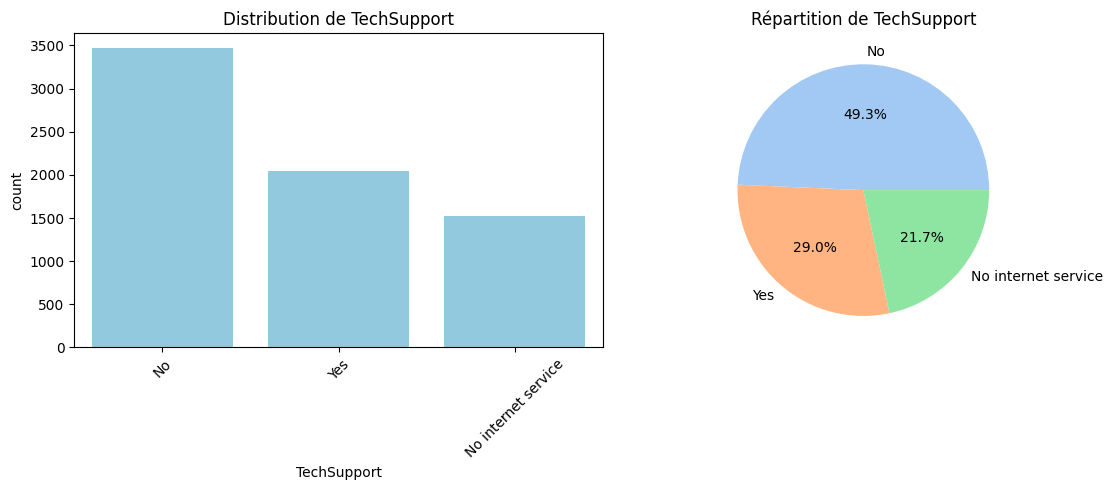

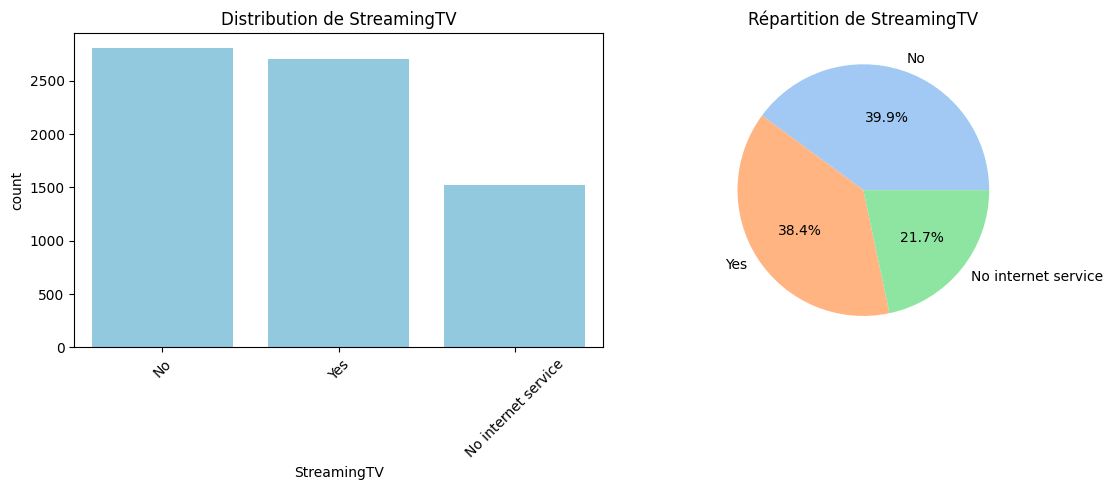

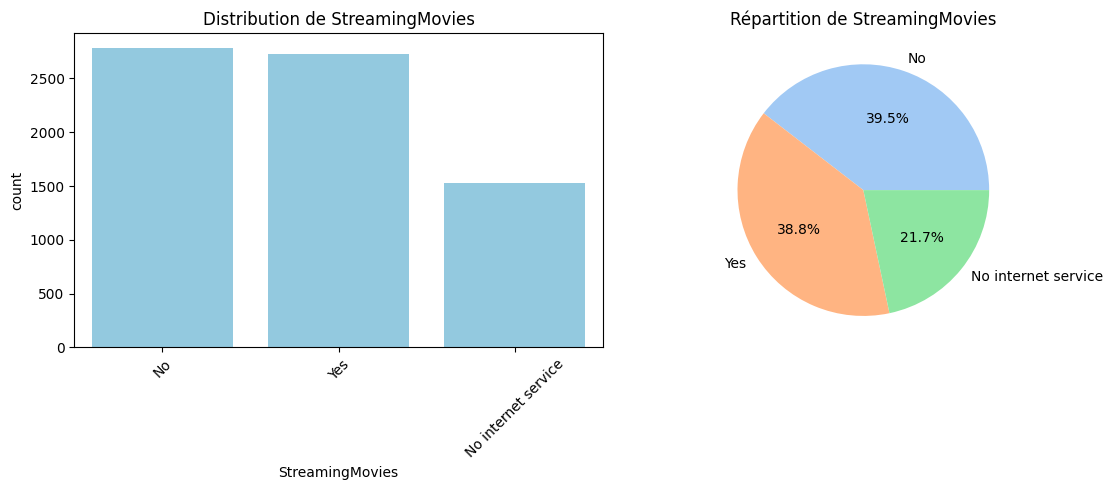

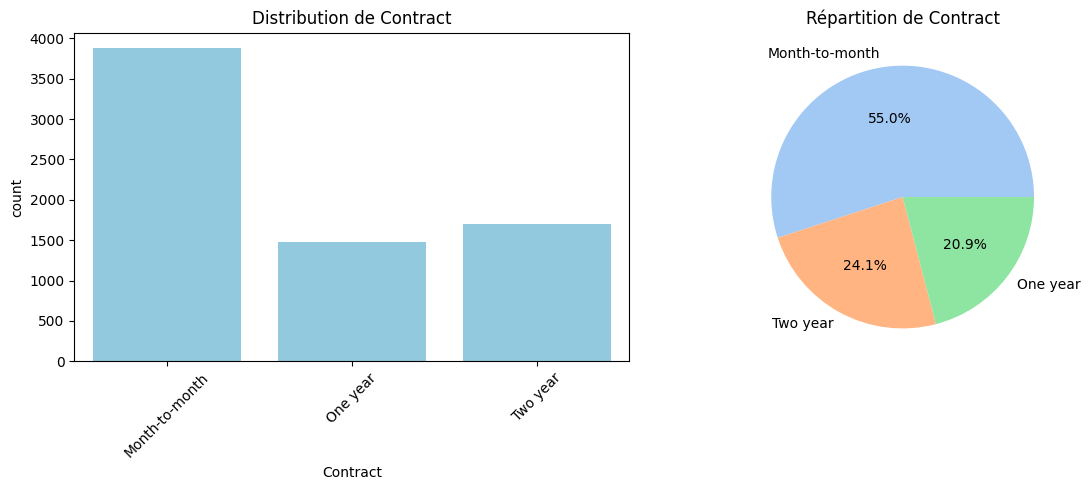

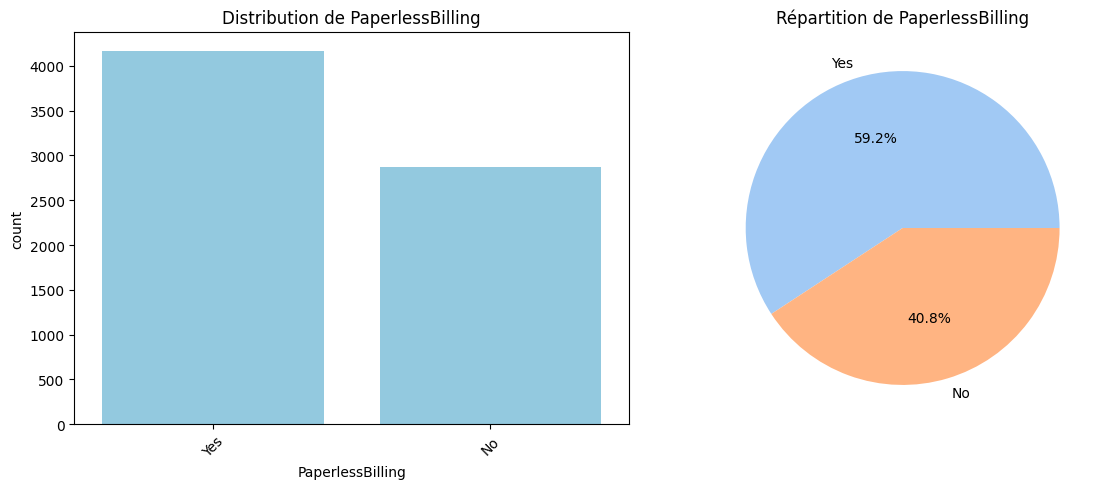

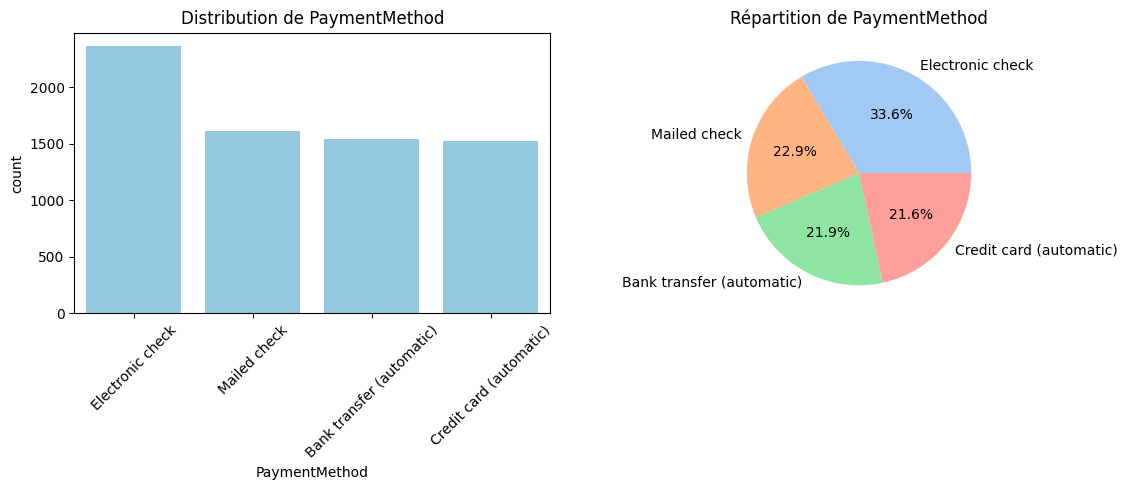

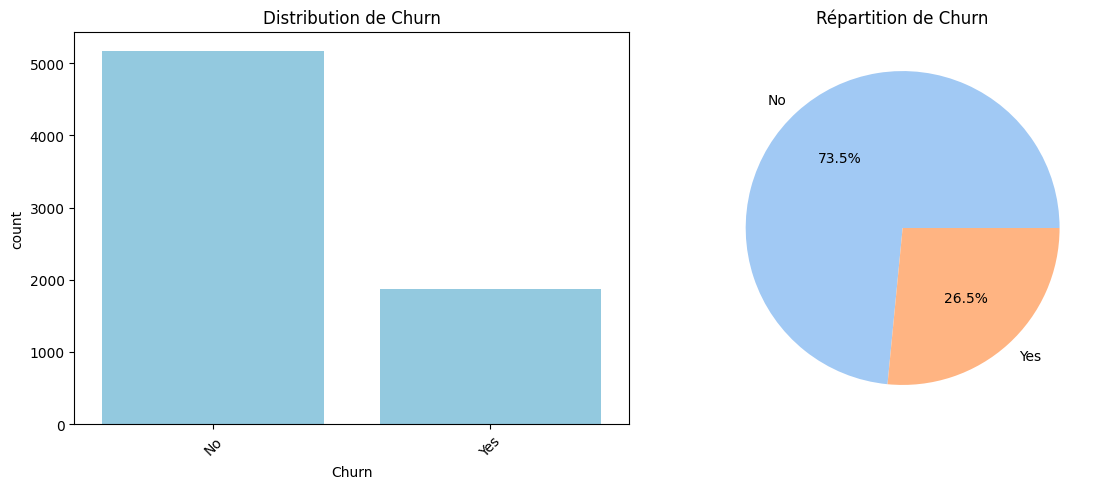

In [283]:
for var in cat_var:
    plt.figure(figsize=(12,5))
    
    # Barplot
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[var], color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)

    # Pieplot
    plt.subplot(1, 2, 2)
    data[var].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Répartition de {var}')
    plt.ylabel('')  # Enlève l'étiquette "y"

    plt.tight_layout()
    plt.show()

Test t pour SeniorCitizen: Statistique t = -12.8079, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_24356\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


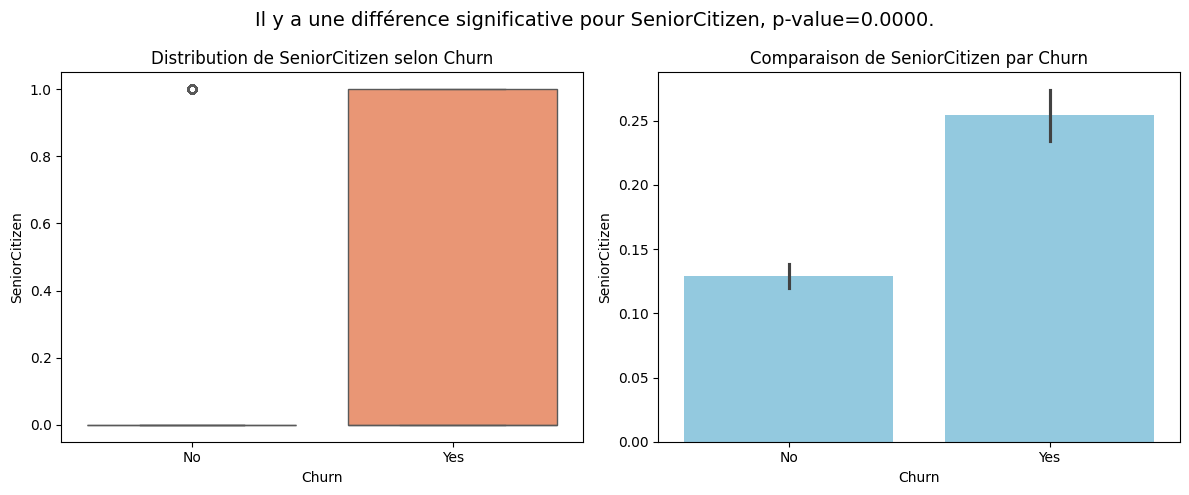

Test t pour tenure: Statistique t = 31.5796, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_24356\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


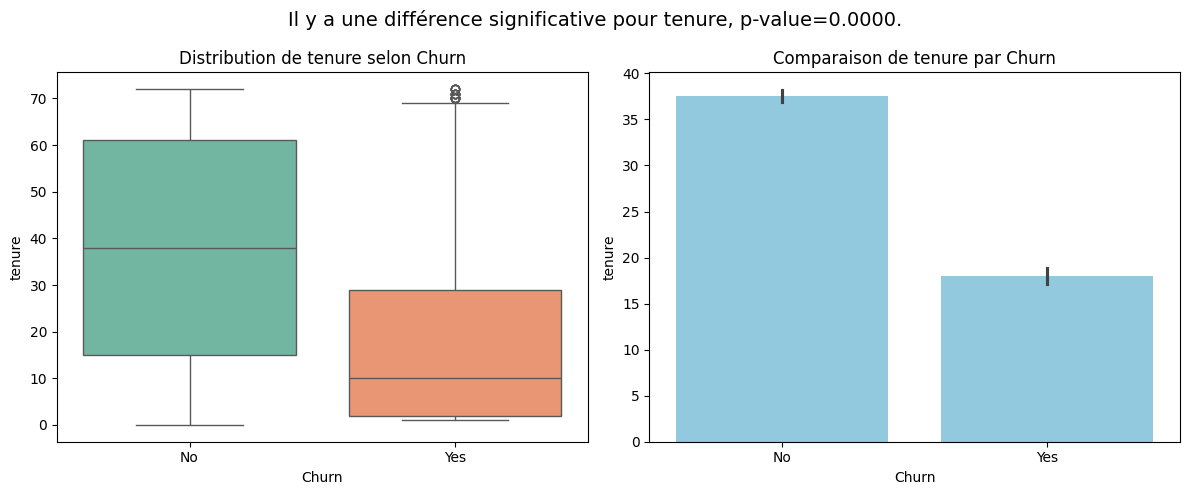

Test t pour MonthlyCharges: Statistique t = -16.5367, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_24356\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


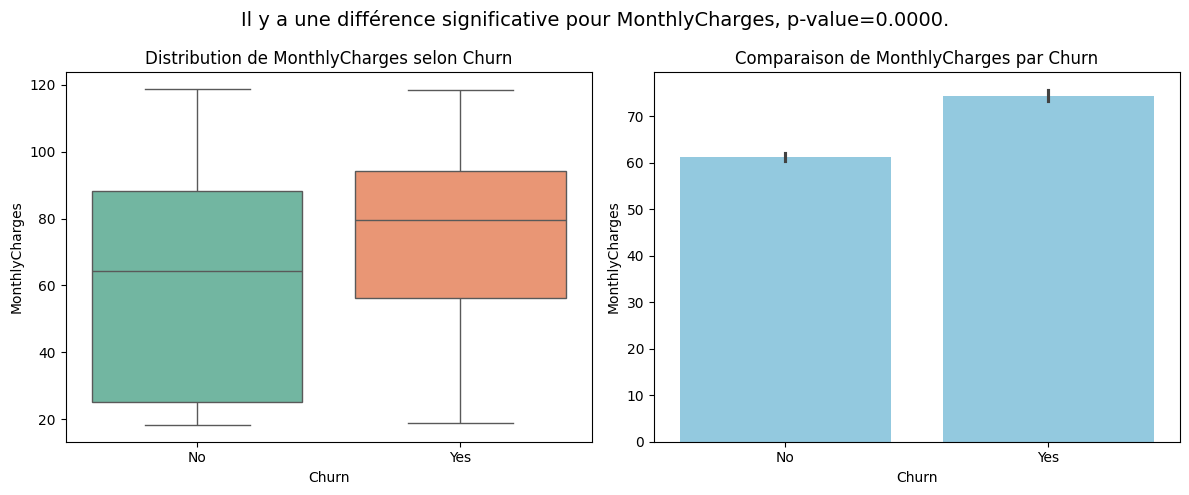

Test t pour TotalCharges: Statistique t = 17.0688, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_24356\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


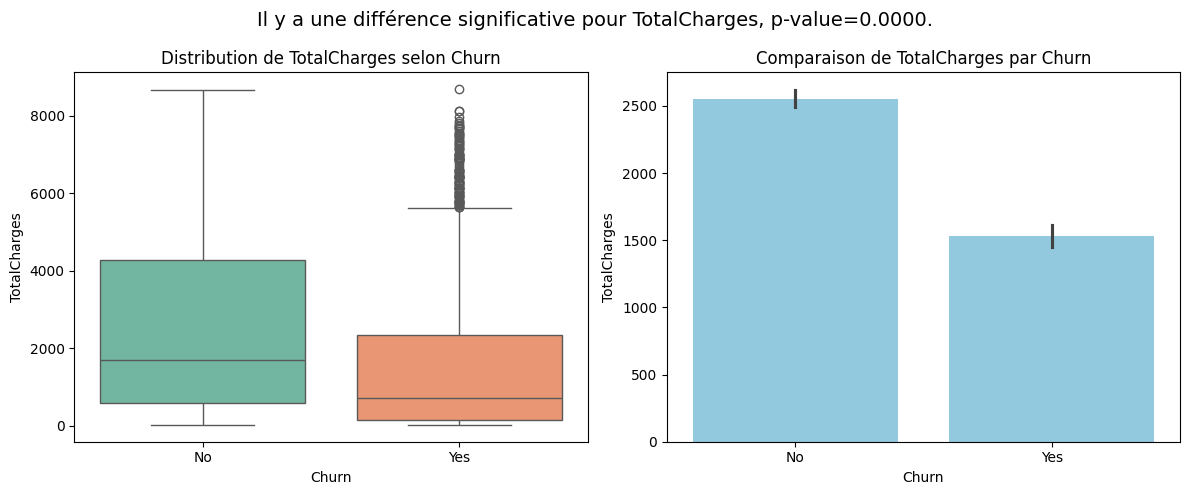

In [284]:
from scipy.stats import ttest_ind


for var in num_var:
    plt.figure(figsize=(12, 5))
    
    group1 = data[data['Churn'] == 'No'][var]
    group2 = data[data['Churn'] == 'Yes'][var]
    
    if len(group1) > 1 and len(group2) > 1 and group1.nunique() > 1 and group2.nunique() > 1:
        stat, p_value = ttest_ind(group1.dropna(), group2.dropna(), nan_policy='omit')
    else:
        stat = np.nan
    
    print(f"Test t pour {var}: Statistique t = {stat:.4f}, P-value = {p_value:.4f}")
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn', y=var, data=data, palette='Set2')
    plt.title(f'Distribution de {var} selon Churn')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Churn', y=var, data=data, color='skyblue')
    plt.title(f'Comparaison de {var} par Churn')
    
    if p_value is not np.nan and p_value < 0.05:
        plt.suptitle(f'Il y a une différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)
    else:
        plt.suptitle(f'Il n\'y a pas de différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)

    plt.tight_layout()
    plt.show()


Variable: gender
Tableau de contingence :
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi2 = 0.4841, p-value = 0.4866, degrés de liberté = 1
V de Cramer = 0.0000


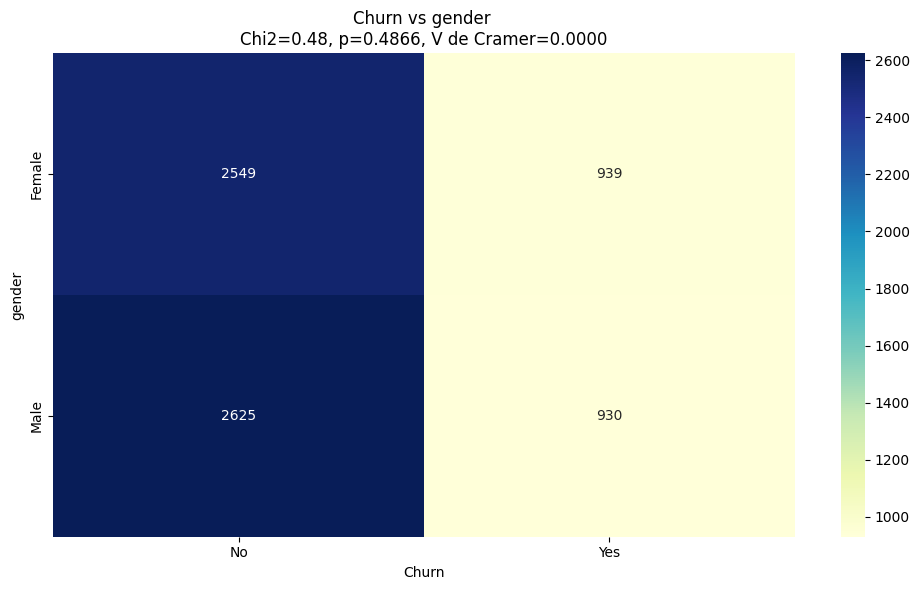


Variable: Partner
Tableau de contingence :
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Chi2 = 158.7334, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1497


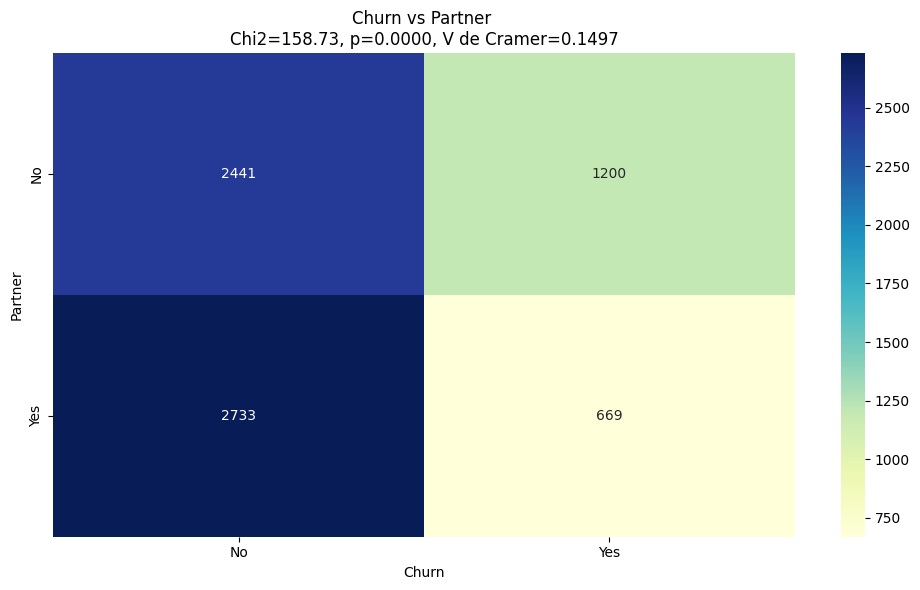


Variable: Dependents
Tableau de contingence :
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Chi2 = 189.1292, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1634


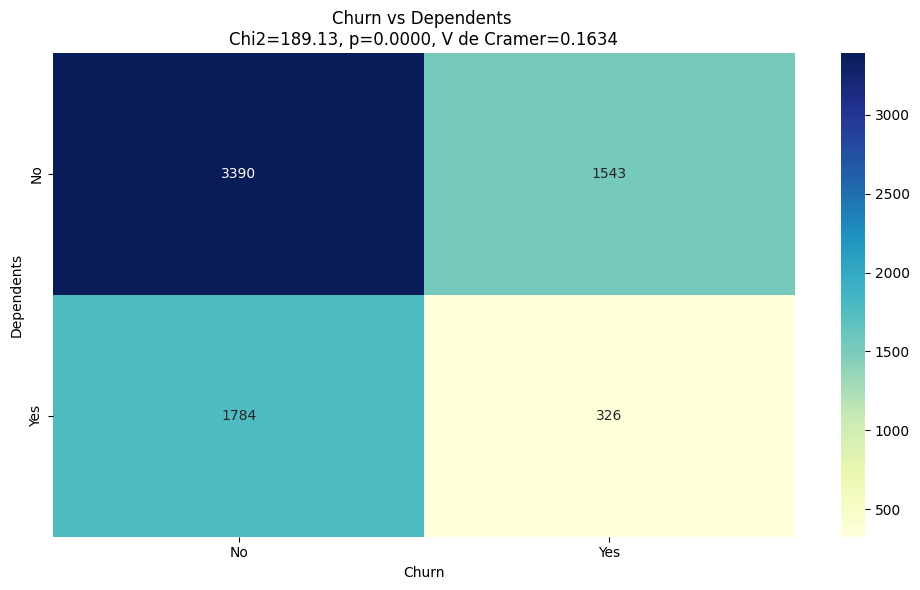


Variable: PhoneService
Tableau de contingence :
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699
Chi2 = 0.9150, p-value = 0.3388, degrés de liberté = 1
V de Cramer = 0.0000


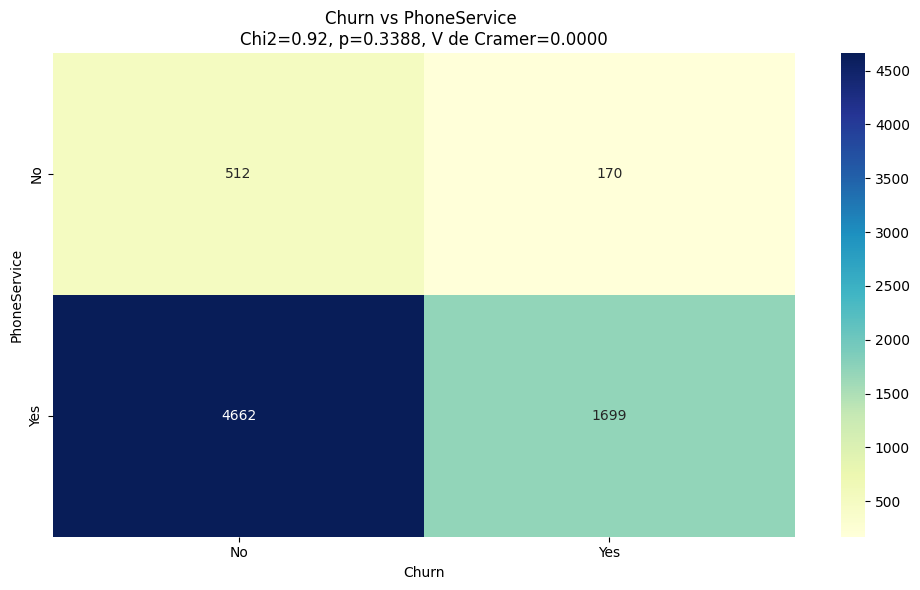


Variable: MultipleLines
Tableau de contingence :
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850
Chi2 = 11.3304, p-value = 0.0035, degrés de liberté = 2
V de Cramer = 0.0364


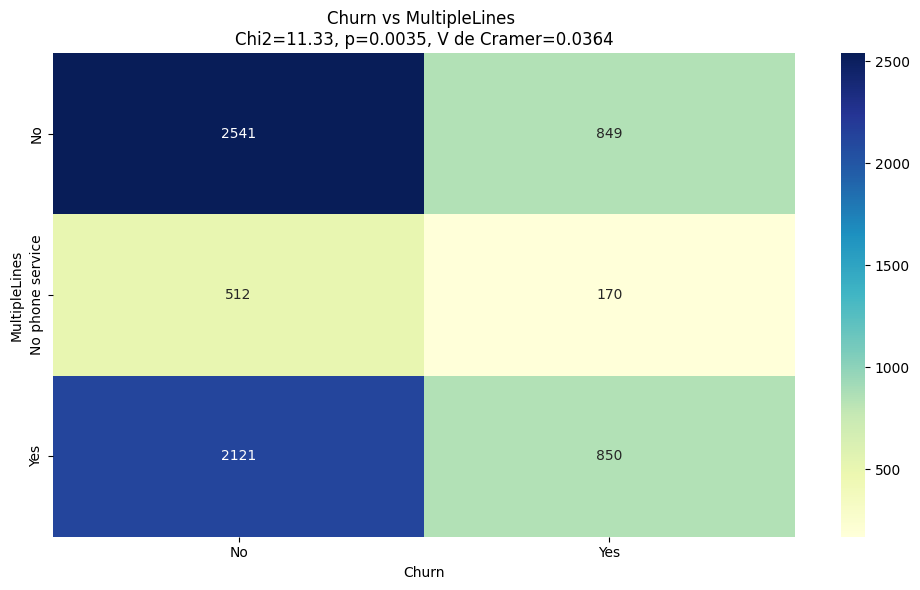


Variable: InternetService
Tableau de contingence :
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Chi2 = 732.3096, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.3220


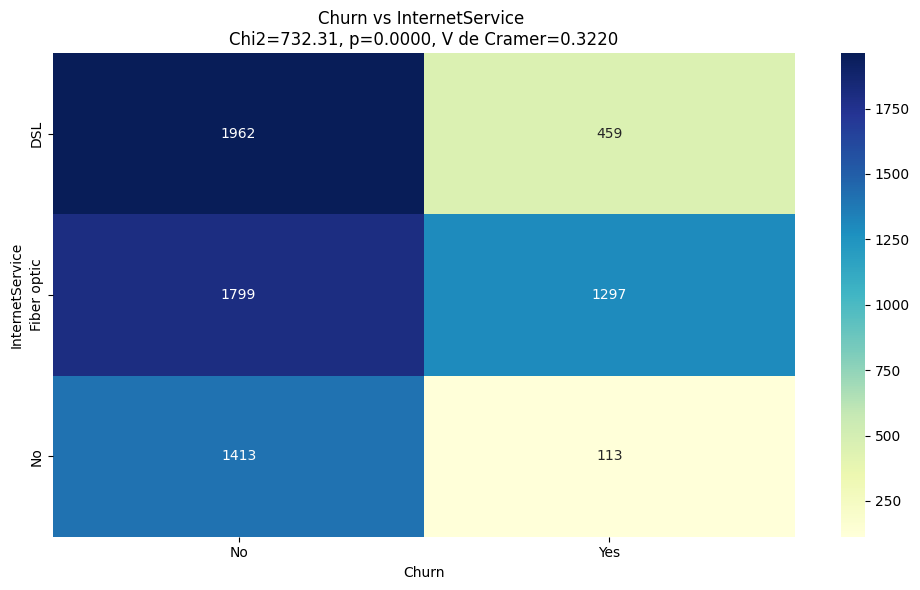


Variable: OnlineSecurity
Tableau de contingence :
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295
Chi2 = 849.9990, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.3470


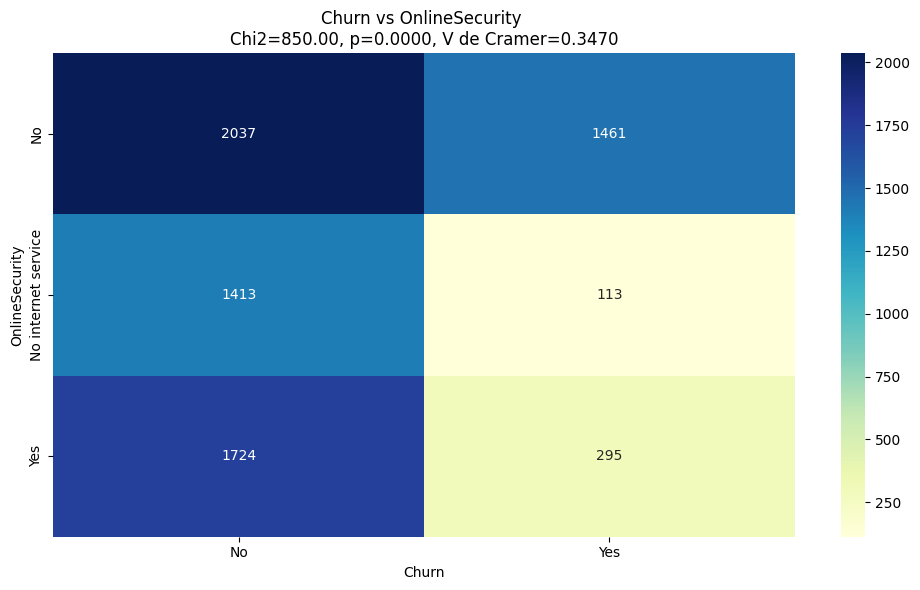


Variable: OnlineBackup
Tableau de contingence :
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523
Chi2 = 601.8128, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2919


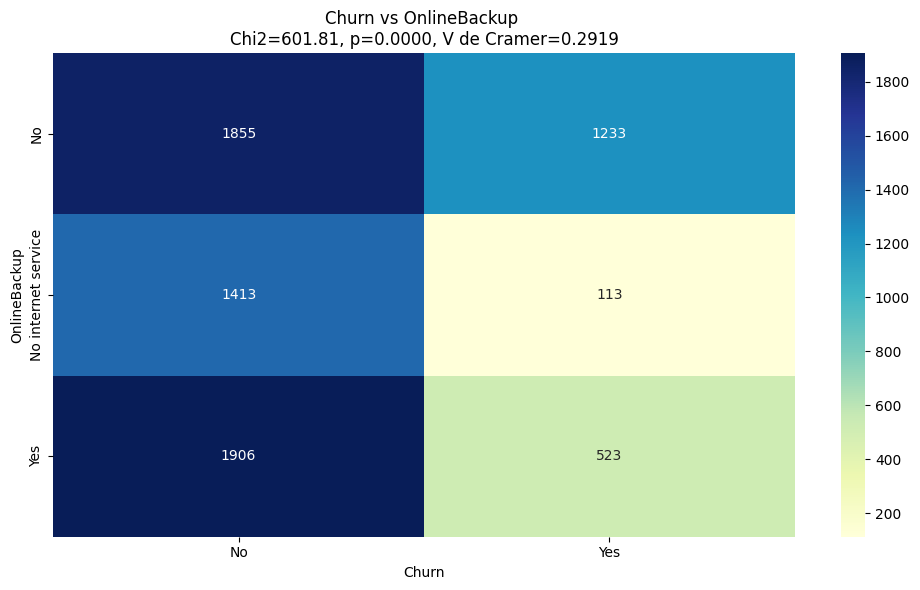


Variable: DeviceProtection
Tableau de contingence :
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545
Chi2 = 558.4194, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2811


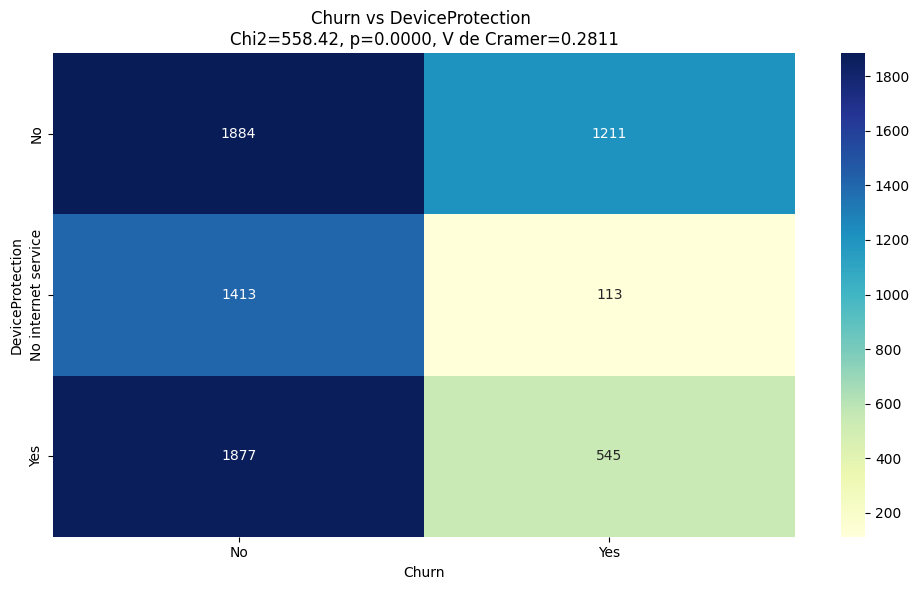


Variable: TechSupport
Tableau de contingence :
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310
Chi2 = 828.1971, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.3425


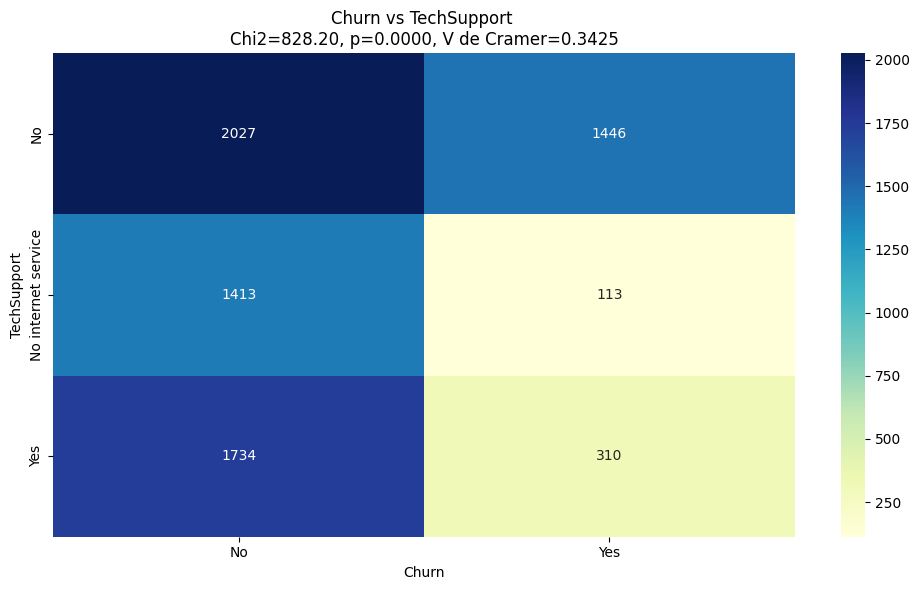


Variable: StreamingTV
Tableau de contingence :
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814
Chi2 = 374.2039, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2299


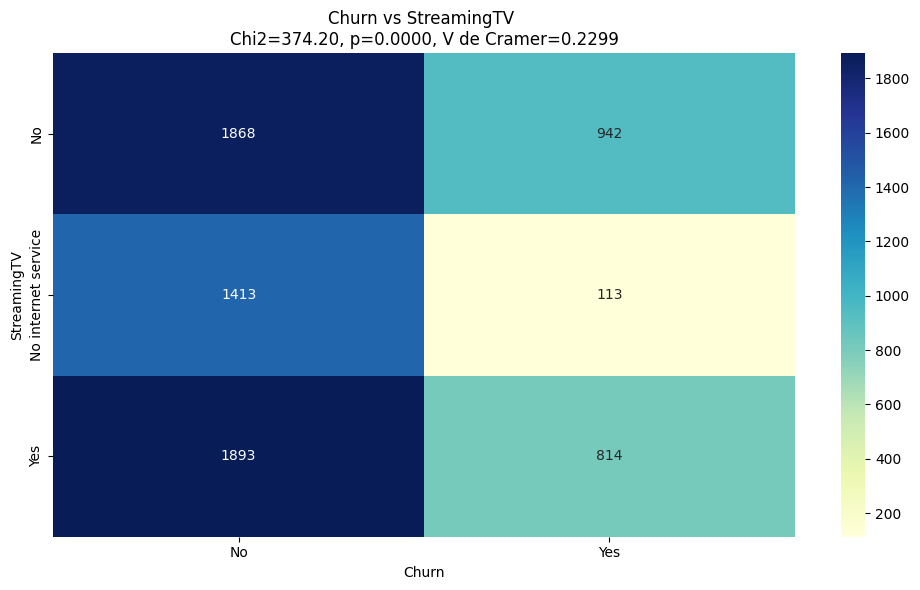


Variable: StreamingMovies
Tableau de contingence :
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818
Chi2 = 375.6615, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2304


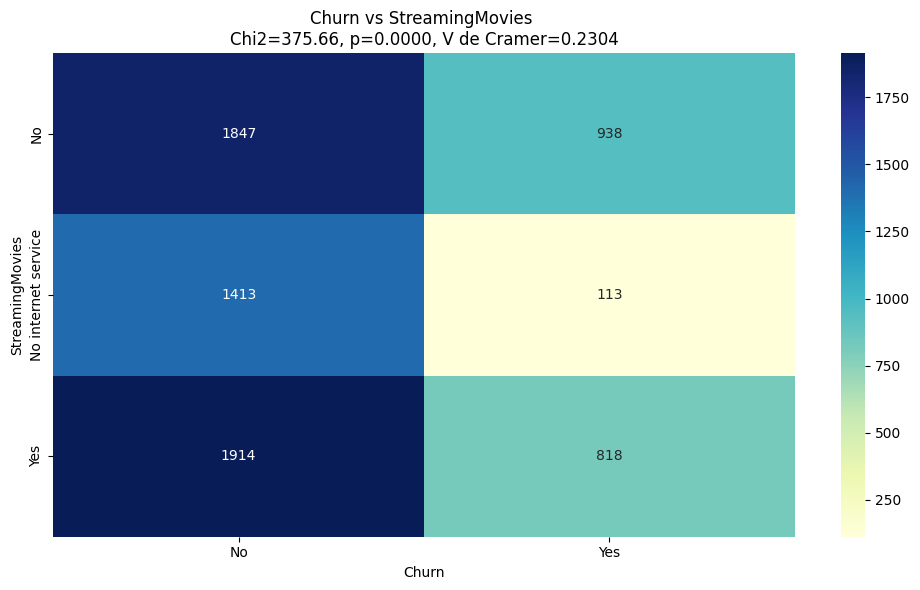


Variable: Contract
Tableau de contingence :
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Chi2 = 1184.5966, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.4098


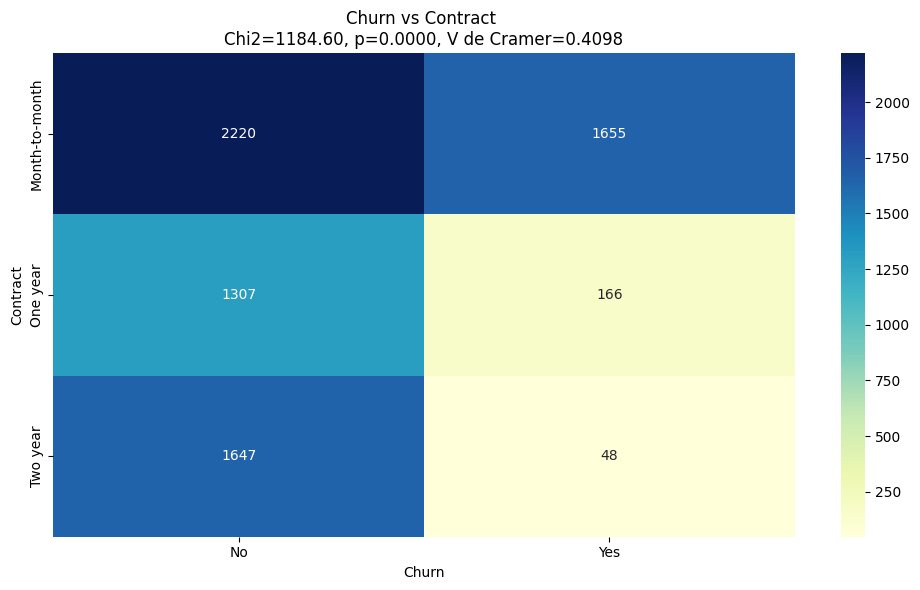


Variable: PaperlessBilling
Tableau de contingence :
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
Chi2 = 258.2776, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1911


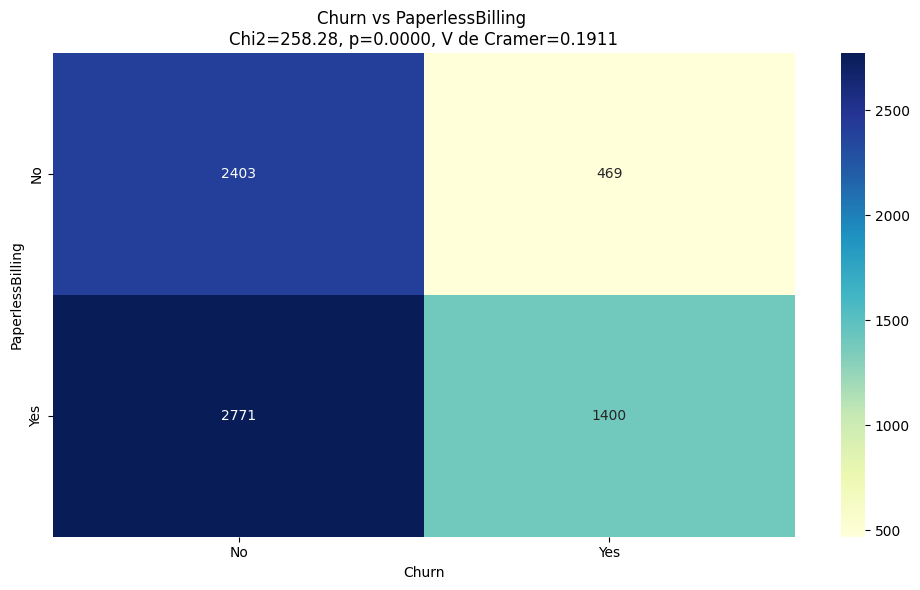


Variable: PaymentMethod
Tableau de contingence :
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Chi2 = 648.1423, p-value = 0.0000, degrés de liberté = 3
V de Cramer = 0.3027


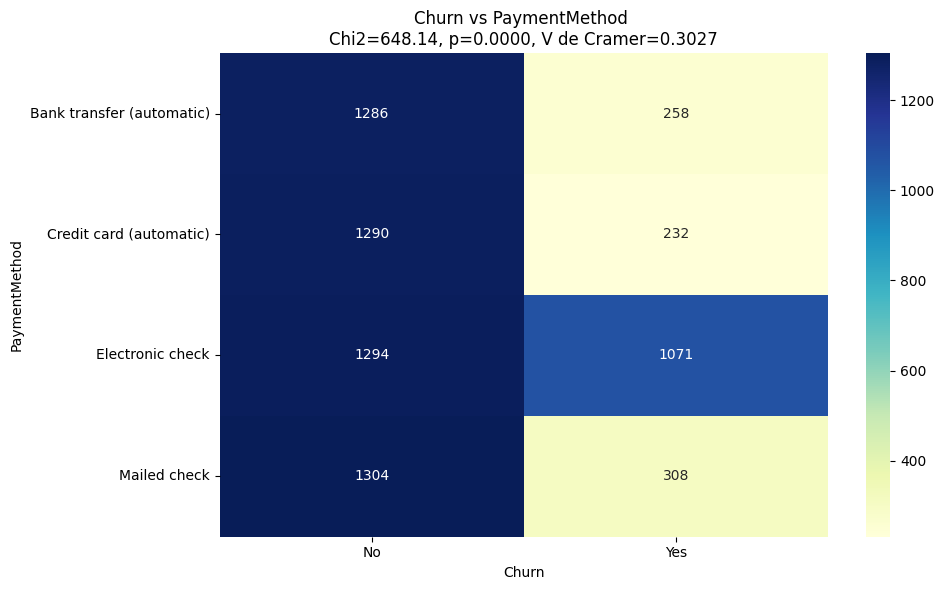


Variable: Churn
Tableau de contingence :
Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869
Chi2 = 7037.8714, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.9996


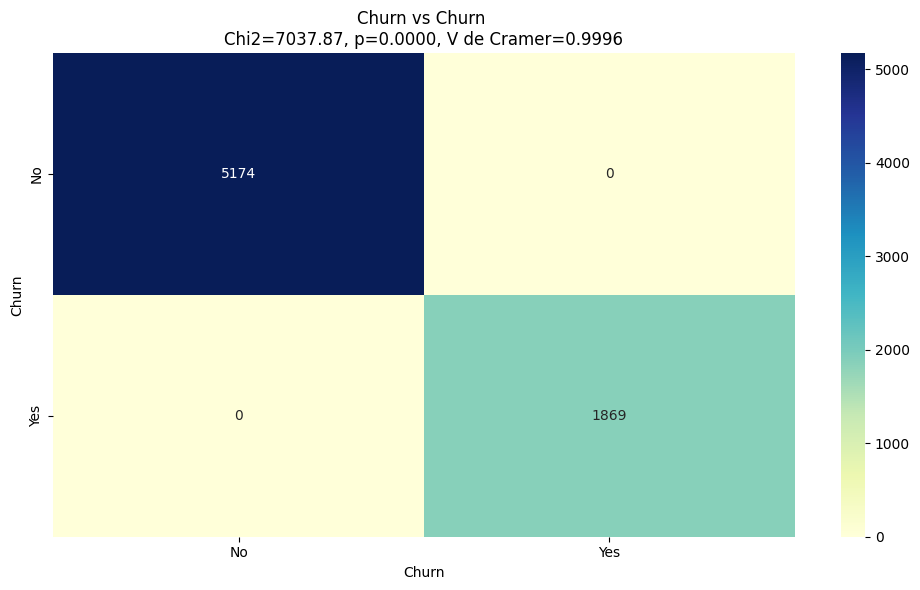

In [285]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
target_column = 'Churn'

# Fonction pour calculer le V de Cramer
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # correction pour les petits échantillons
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Boucle sur chaque variable catégorielle
for var in cat_var:
    print(f"\nVariable: {var}")
    
    # Tableau de contingence
    contingency_table = pd.crosstab(data[var], data[target_column])
    print("Tableau de contingence :")
    print(contingency_table)
    
    # Test du khi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # V de Cramer
    v_cramer = cramers_v(contingency_table)
    
    print(f"Chi2 = {chi2:.4f}, p-value = {p_value:.4f}, degrés de liberté = {dof}")
    print(f"V de Cramer = {v_cramer:.4f}")
    
    # Graphique : Heatmap du tableau de contingence
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Churn vs {var} \nChi2={chi2:.2f}, p={p_value:.4f}, V de Cramer={v_cramer:.4f}')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [286]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [287]:
label_enc = LabelEncoder()
data['Churn'] = label_enc.fit_transform(data['Churn'])

In [288]:
for col in cat_var:
    data[col] = label_enc.fit_transform(data[col])

In [289]:
num_var_to_scale = [col for col in num_var if col != 'SeniorCitizen']

scaler = StandardScaler()
data[num_var_to_scale] = scaler.fit_transform(data[num_var_to_scale])

In [290]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994194,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173740,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959649,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195248,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940457,1


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

In [292]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [293]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994194
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173740
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959649
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195248
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.129180
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.241056
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854514
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872095


In [294]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape


((5634, 19), (1409, 19))

In [296]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

recall: 58.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
[[935 101]
 [156 217]]


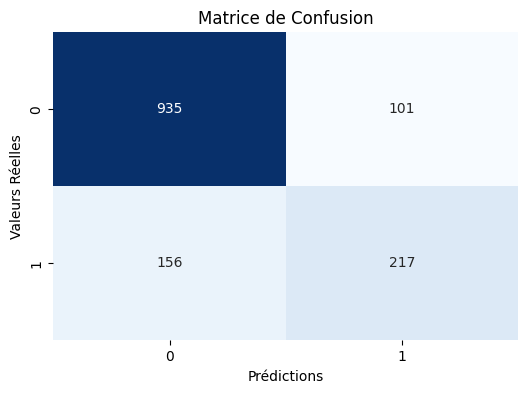

In [297]:
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)
y_pred = logisticmodel.predict(X_test)

# Évaluer
recall = recall_score(y_test, y_pred)
print(f'recall: {recall * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 👉 Affichage en heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

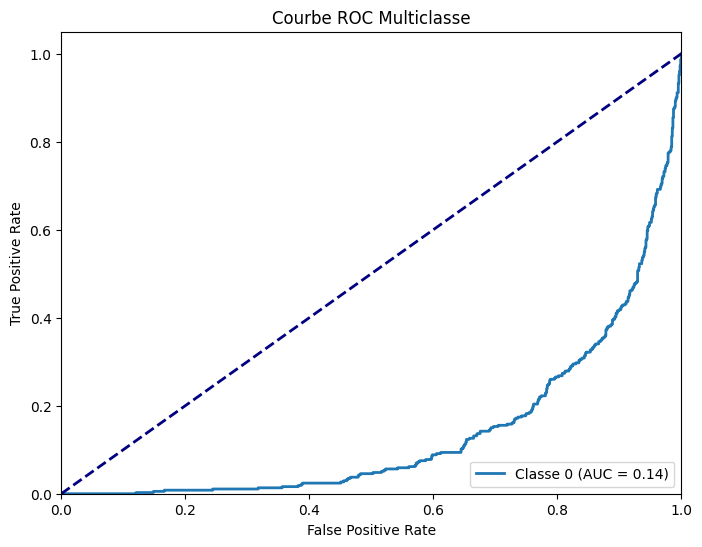

In [299]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarisation des labels
y_test_bin = label_binarize(y_test, classes=[0, 1])  # Remplacez [0, 1, 2] par les classes de votre jeu de données

# Prédictions de probabilité pour chaque classe
y_pred_prob = logisticmodel.predict_proba(X_test)

# Initialiser les courbes ROC et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

# Calcul des courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

# Courbe de base (diagonale)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Multiclasse')
plt.legend(loc='lower right')
plt.show()


recall: 51.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.59      0.51      0.55       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
[[902 134]
 [182 191]]


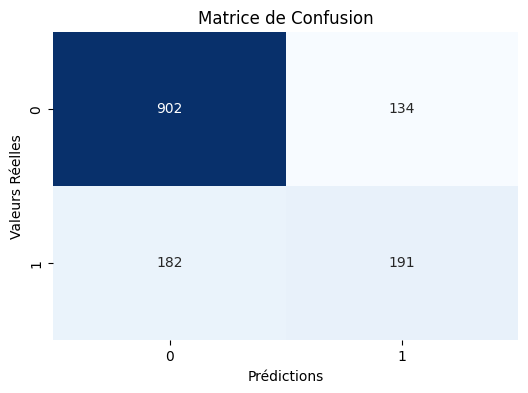

In [301]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Évaluer
recall = recall_score(y_test, y_pred)
print(f'recall: {recall * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 👉 Affichage en heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()


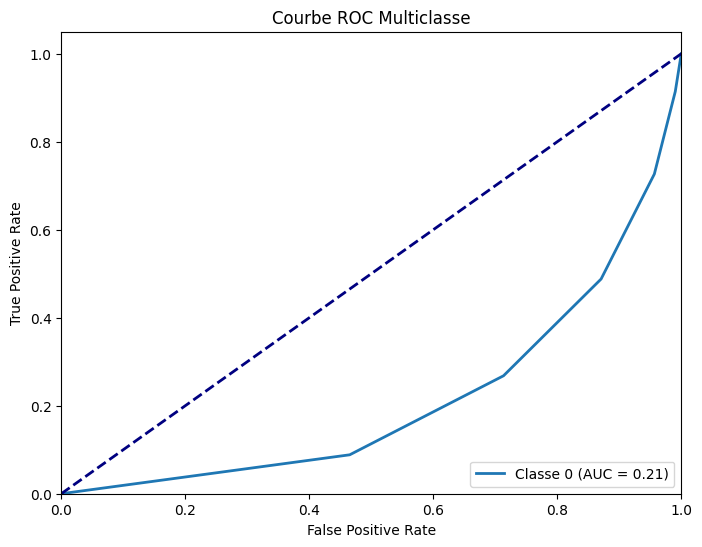

In [302]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarisation des labels
y_test_bin = label_binarize(y_test, classes=[0, 1])  # Remplacez [0, 1, 2] par les classes de votre jeu de données

# Prédictions de probabilité pour chaque classe
y_pred_prob = knn.predict_proba(X_test)

# Initialiser les courbes ROC et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

# Calcul des courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

# Courbe de base (diagonale)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Multiclasse')
plt.legend(loc='lower right')
plt.show()
